# Бинарная классификация

Для уверенной работы с данными вам пригодится знание:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Sklearn - библиотеки с основными инструментами ML

Посмотрим, как пользоваться логистической регрессией в python для решения задач классификации.

Для примера будем пользоваться встроенным в `sklearn` датасетом для решения задачи бинарной классификации — `load_breast_cancer`.

В датасете содержатся числовые признаки женщин (результаты исследований, биологические характеристики), а целевая переменная (1 или 0) показывает, больна ли пациентка раком груди или нет.

**Наши цели на сегодня**

*  Обучить логистическую регрессию на представленном датасете.
*  Оценить качество полученной модели и сравнить с методом ближайших соседей.

## Загрузка данных и обучение модели

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = load_breast_cancer(as_frame=True)

X = data.data # матрица объект-признак
y = data.target # вектор целевой переменной

X.shape, y.shape

((569, 30), (569,))

Посмотрим на данные.

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

Эксперты в области сказали, что признак *fractal dimension error* не нужен в этой задаче.

Давайте его удалим (заодно узнаем как это делается).

In [5]:
X.drop('fractal dimension error', axis=1, inplace=True)

Проверим, сбалансирована ли выборка.

In [6]:
len(y[y==0]), len(y[y==1])

(212, 357)

Баланса классов нет, но и перекос не такой сильный.

Для решения этой задачи будем использовать **линейную модель классификации — логистическую регрессию**.

Для начала разобъём данные на train и test (test — 20% от всех данных).

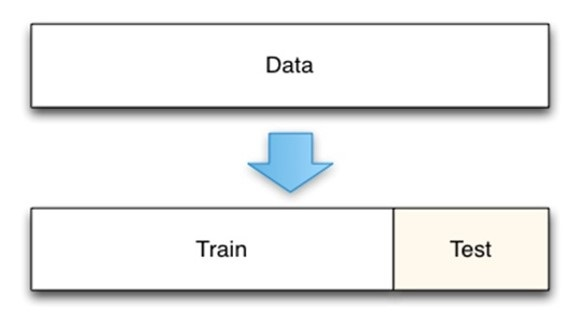

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.044985,0.297085,1.010448,0.903128,0.526420,0.488082,0.379781,0.981747,0.663632,-0.302590,...,0.932100,-0.046983,0.857380,0.754906,0.724632,0.758927,0.284225,1.218398,0.298119,0.083807
1,1.681411,-1.140982,1.703381,1.746022,0.286087,0.534308,1.351402,1.389686,-0.008492,-0.579773,...,1.223617,-1.438180,1.262419,1.135042,0.237388,-0.330625,0.626789,0.697164,-0.885950,-0.412347
2,-1.442609,-1.127329,-1.450464,-1.154826,-1.916968,-1.423329,-1.072274,-1.171440,-0.085621,0.835949,...,-1.340339,-0.896982,-1.360278,-1.033921,-1.512633,-1.317883,-1.261384,-1.522338,0.180732,-0.336571
3,-0.554380,-1.197867,-0.552455,-0.559306,-1.113672,-0.516737,-0.265180,-0.615972,-0.607160,-0.175920,...,-0.655273,-1.021139,-0.591854,-0.622836,-1.332623,-0.084264,0.173957,-0.364720,-0.353460,0.276857
4,-0.518408,-1.002181,-0.572082,-0.539704,-0.695638,-1.143089,-0.855138,-0.737897,-0.882620,-0.840564,...,-0.645289,-1.409529,-0.693544,-0.617453,-1.233370,-1.220114,-1.092356,-1.013948,-0.998233,-1.437133


Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [9]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [10]:
pred_test = model.predict(Xtest) # предсказание классов

Посмотрим на предсказания модели и оценим долю правильных ответов.

In [11]:
pred_test[:5]

array([1, 0, 1, 0, 0])

In [12]:
accuracy_score(ytest, pred_test)

0.9824561403508771

Получили модель отличного качества! Но мы помним про дисбаланс классов, поэтому попозже надо посчитать и другие метрики.

Посмотрим на веса модели.

In [13]:
model.coef_, model.intercept_

(array([[-0.41807232, -0.4176942 , -0.40424209, -0.44086339, -0.18721873,
          0.29086812, -0.7479399 , -0.8780672 ,  0.19680518,  0.37633423,
         -1.07249064,  0.10084333, -0.63622356, -0.79575631, -0.1591724 ,
          1.04072076,  0.1741402 , -0.33494616,  0.1132696 , -1.08164098,
         -1.03797804, -0.94854189, -1.01168479, -0.63677097, -0.0318132 ,
         -0.97832541, -0.94505413, -0.79833342, -0.24429141]]),
 array([0.1805618]))

In [14]:
import pandas as pd

coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

coef_table.sort_values(by='Coefs')

,0,Coefs
19,worst radius,-1.081641
10,radius error,-1.072491
20,worst texture,-1.037978
22,worst area,-1.011685
25,worst concavity,-0.978325
21,worst perimeter,-0.948542
26,worst concave points,-0.945054
7,mean concave points,-0.878067
27,worst symmetry,-0.798333
13,area error,-0.795756


In [15]:
# scipy.stats

Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Вероятности.

Также мы можем посмотреть на предсказанные логистической регрессией вероятности.

In [16]:
probs = model.predict_proba(Xtest) # предсказание вероятностей

probs[:5]

array([[0.10466591, 0.89533409],
       [0.98923175, 0.01076825],
       [0.01293502, 0.98706498],
       [0.9952194 , 0.0047806 ],
       [0.87513944, 0.12486056]])

Для каждого объекта модель выдаёт две вероятности: первое число — вероятность класса 0, вторая — вероятность класса 1 (можно проверить, что сумма вероятностей равна 1).

## Метод ближайших соседей

Существует еще один простой метод для решения задач классификации - метод ближайших соседей.

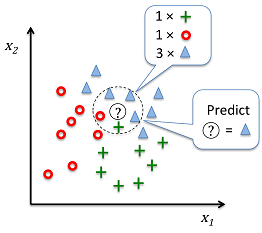

Попробуем применить метод ближайших соседей для решения поставленной задачи.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()

In [18]:
model3.fit(Xtrain, ytrain)

pred_test3 = model3.predict(Xtest)

accuracy_score(ytest, pred_test3)

0.956140350877193

## Анализ матрицы ошибок и ROC-AUC

In [19]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [20]:
confusion_matrix(ytest, pred_test)

array([[40,  2],
       [ 0, 72]])

In [21]:
score = roc_auc_score(ytest, probs[:,1])
score

0.9966931216931216

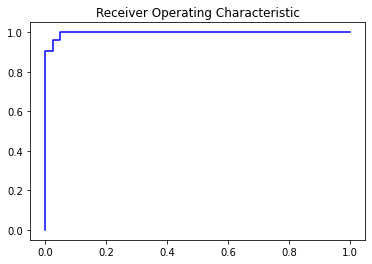

In [22]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score);